In [1]:
#Import lib
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#============  Read Data
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
print(df)

       MSSV GT  DT   KV    M1    M2    M3  KT    NGAYTHI DINHHUONGNGHENGHIEP
0     SV001  F NaN  2NT  3.25  3.25  4.50  A1  12/7/2018                  No
1     SV002  M NaN    1  6.00  4.00  3.50   C  12/7/2018                 Yes
2     SV003  M NaN    1  5.00  6.75  4.00   C  12/7/2018                  No
3     SV004  M NaN    1  4.25  4.25  5.25  D1  12/7/2018                  No
4     SV005  M NaN  2NT  4.25  4.50  5.00   A  12/7/2018                  No
..      ... ..  ..  ...   ...   ...   ...  ..        ...                 ...
95   SV0096  F NaN    1  5.25  1.50  6.25   C  7/20/2022                 Yes
96   SV0097  F NaN    1  5.25  3.75  4.75   C  7/20/2022                  No
97   SV0098  M NaN  2NT  7.00  8.00  4.00   C  7/20/2022                 Yes
98   SV0099  M NaN    1  5.00  3.50  5.50   C  7/20/2022                  No
99  SV00100  M NaN  2NT  5.25  2.50  4.25   C  7/20/2022                 Yes

[100 rows x 10 columns]


In [3]:
# ============ Data Manipulation
# df.info()
# Rename NGAYTHI: NT, DINHHUONGNGHENGHIEP: NGHE
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
# ============ Print 5 row
print(df.head(5))

    MSSV GT  DT   KV    M1    M2    M3  KT         NT NGHE
0  SV001  F NaN  2NT  3.25  3.25  4.50  A1  12/7/2018   No
1  SV002  M NaN    1  6.00  4.00  3.50   C  12/7/2018  Yes
2  SV003  M NaN    1  5.00  6.75  4.00   C  12/7/2018   No
3  SV004  M NaN    1  4.25  4.25  5.25  D1  12/7/2018   No
4  SV005  M NaN  2NT  4.25  4.50  5.00   A  12/7/2018   No


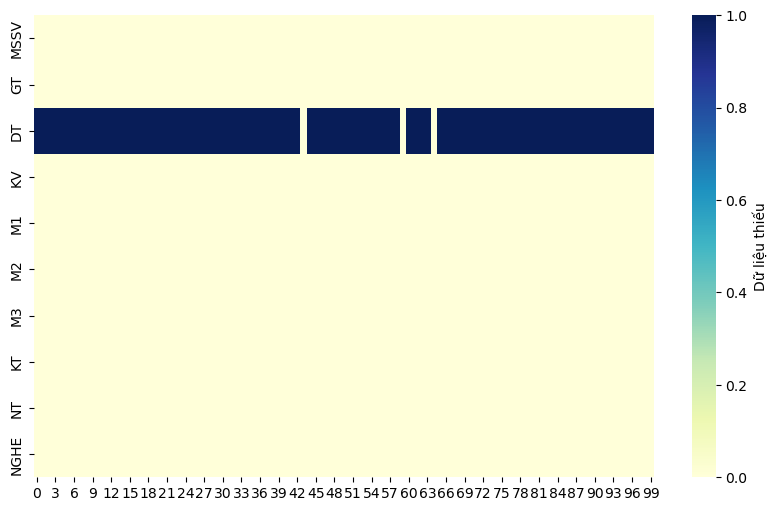

In [4]:
# ============ Biểu đồ trước khi điền giá trị bị thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [5]:
#============  Thay thế các giá trị bị thiếu
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

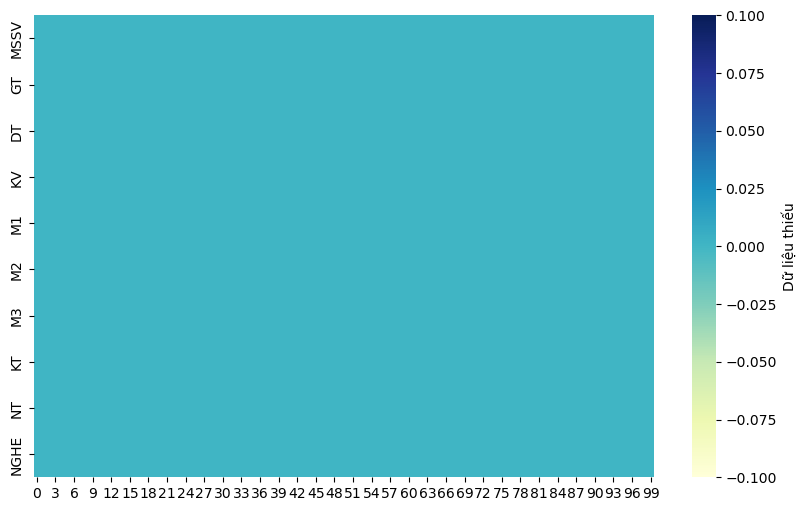

In [6]:
#============  Biểu đồ sau khi điền giá trị bị thiếu
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()


In [7]:

#============  Tạo cột điểm trung bình
TBM = df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
print(TBM)


0     3.666667
1     4.500000
2     5.250000
3     4.583333
4     4.583333
        ...   
95    4.333333
96    4.583333
97    6.333333
98    4.666667
99    4.000000
Length: 100, dtype: float64


In [8]:
#============  Check điều kiện và gán dữ liệu
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL


In [9]:
# Phuong phap Map
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3


In [10]:

# Tạo biến só điểm cộng
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM,PLUS
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1,0.0
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3,0.0
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3,0.0
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3,0.0
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3,0.0


In [ ]:
#CAC LOAI BIEU DO

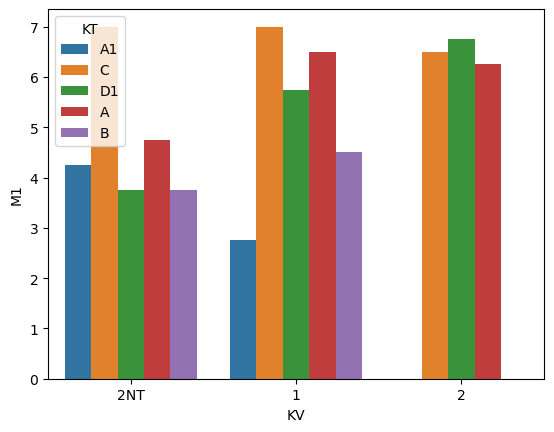

In [11]:
# Bieu do BAR
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

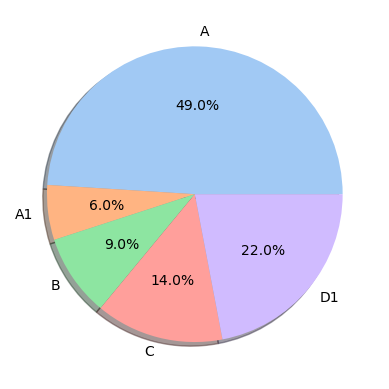

In [12]:
# Bieu do PIE
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

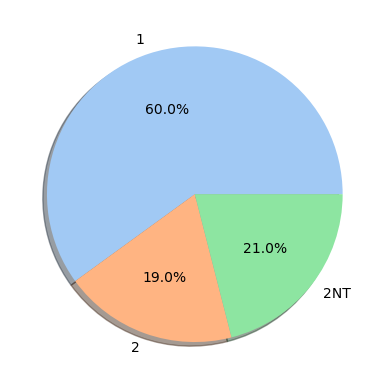

In [13]:
# Thong ke ty le phan tram cho KV
gb = df.groupby(['KV'])['KV'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

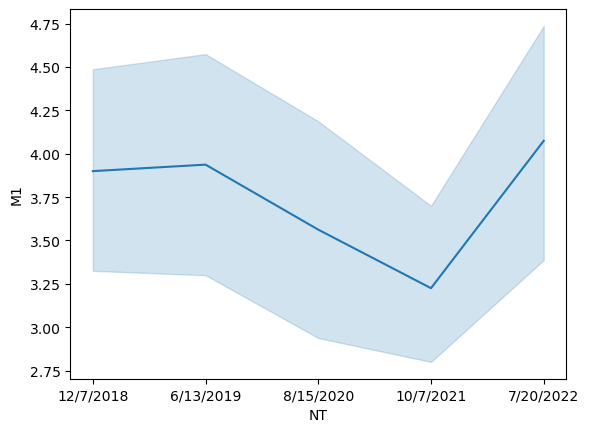

In [14]:
# Bieu do Line
# Tong hop diem trung binh M1 theo NgayThi
sns.lineplot(x='NT', y='M1', data=df)
plt.show()


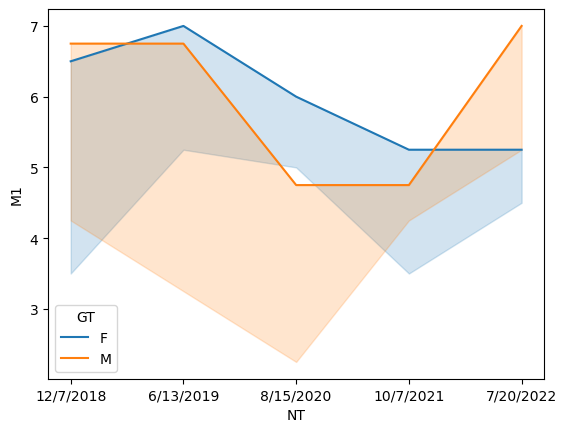

In [15]:
sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()

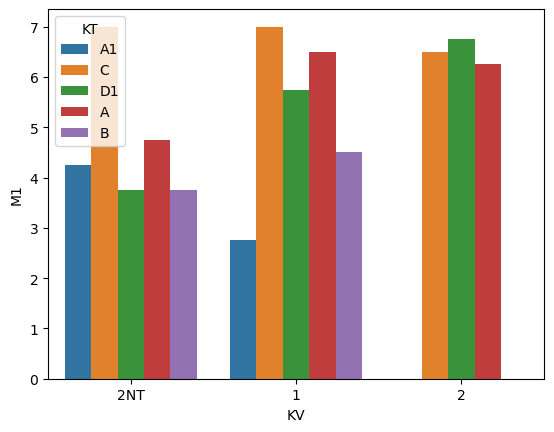

In [16]:
sns.barplot(x='KV', y='M1', hue='KT', 
             data=df, errorbar=None,estimator=np.max)
plt.show()

# Danh gia bieu do
# Khu vuc 1 co khoi thi cao nhat la khoi C voi diem M1 khoang 7

In [ ]:
#--------------------------------------------------------Buoi 3 (Ly thuyet)
# Thống kể dữ liệu (Mô tả dữ liệu)
# Phân tích định lượng lấy trọng tâm là các biến định lượng Mục đích: Mô tả các tri thức đang ẩn chứa bên trong dữ liệu, thông qua ý nghĩa các đại lượng mô tả toán học.
# Có 2 nhóm đại lượng mô tả:
# Đo lường độ tập trung: min, max, mean, median, mode, p-phân vị
# Đo lường độ phân tán: range, IQR, độ lệch trung bình


# df['M1'].max() - df['M1'].min()

# df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

# np.mean(np.abs(df['M1'] - np.mean(df['M1'])))

# df[['M1','M2']].max() - df[['M1','M2']].min()

# df['M1'].var()

# df['M1'].std()

# print(df[['M1','M2']].mean())
# print(df[['M1','M2']].std())

# df[['M1','M2']].std()/df[['M1','M2']].mean()

# df['M1'].describe()

# df[['M1','M2','M3']].describe()

# cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
# list(cv)

# df.groupby('GT')['M1'].describe()

# df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()




In [17]:
# Bước 1: Mô tả biến định lượng
#Các đại lượng đo lường mức độ tập trung (phân bổ của dữ liệu)
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')

1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5



In [18]:
# Hãy tính phân vị thứ 9 trong thập vân vị (gọi là p9) cho M1 và M2
# gợi ý: phân vị thứ 9 có tỉ lệ là 0.9
print(f'{df["M1"].quantile(0.9)}\n')
print(f'{df["M2"].quantile(0.9)}\n')

5.300000000000004

5.5



In [19]:
# Các đại lượng đo lường độ biến động (phân tán)
# range
range = df['M1'].max() - df['M1'].min()
range

6.0

In [23]:
# IQR = Q3 - Q1
iqr = df['M1'].quantile(0.75) - df['M1'].quantile(0.25) 
iqr

2.25

In [20]:
# Hãy cho biết độ lớn khoảng dao động của M2 ( gợi ý: |range|)
range = df['M2'].max() - df['M2'].min()
# Độ lớn của IQR của M2 là bao nhiêu (gợi ý: |IQR|)
iqr = df['M2'].quantile(0.75) - df['M2'].quantile(0.25)
#Khoảng giá trị IQR của M2 (gợi ý [Q1;Q3])
print('Độ lớn khoảng dao động của M2',range)
print('Độ lớn IQR của M2',iqr)
print('Khoảng giá trị IQR của M2')
print(f'{df["M2"].quantile(0.25)}')
print(f'{df["M2"].quantile(0.75)}')



Độ lớn khoảng dao động của M2 6.5
Độ lớn IQR của M2 1.25
Khoảng giá trị IQR của M2
3.5
4.75


In [41]:
# ĐỘ lệch trung bình (deltaD)


In [21]:
#Bai tập:
# Hãy tính khoảng range cho M1 và M2
df[['M1','M2']].max() - df[['M1', 'M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [37]:
# hãy tính độ lớn khoảng IQR cho M1 và M2
df[['M1','M2']].quantile(0.75) - df[['M1','M2']].quantile(0.25)


M1    2.25
M2    1.25
dtype: float64

In [22]:
#Hãy tính độ lệch trung bình cho M1 và M2
np.mean(np.abs(df['M1'] - np.mean(df['M1'])))

1.1600000000000001

In [39]:
# Phương sai variance (var)
df['M1'].var()

2.0289393939393956

In [23]:
# Độ lệch chuẩn standard deviation (std)
df['M1'].std()

1.4244084364884237

In [24]:
# Phương pháp dùng Cofficient of variance (CV)
# Mức độ biến động của hai hay nhiều biến số
# Hãy so sanh mức độ biến động củ M1 và M2
cv = df[['M1','M2']].std() / df[['M1','M2']].mean()
cv

M1    0.380858
M2    0.249131
dtype: float64

In [25]:
# Sử dung CV đẻ so sánh mức độ phân tán của M1, M2, M3
# hướng dẫn tính nhanh CV
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
# list(cv) # Chuyển kết quả về dạng ds
# bài tập: Sinh viên viết code để tìm ra giá trị cv lớn nhất và nhỏ nhất
# giá trị cv lớn nhất
maxCV = max(cv)
# giá trị cv nhỏ nhất
minCV = min(cv)
# sắp xép tăng dần ds các giá trị cv
sortCV = sorted(cv)

print('Max CV:', maxCV)
print('Min CV:', minCV)
print('Sort CV:', sortCV)



Max CV: 0.38085787071882987
Min CV: 0.2135664058628459
Sort CV: [0.2135664058628459, 0.2491311130540305, 0.38085787071882987]


In [26]:
# Mô tả biến định lượng
# describe df['M1'].describe()
df[['M1','M2', 'M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [27]:
df.groupby('GT')['M1'].describe()
# Đánh giá xem nhóm giới tính nào thi M1 tốt hơn



,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [28]:
# Tính CV cho M1 theo nhóm giới tính
df.groupby('GT')['M1'].std() / df.groupby('GT')['M1'].mean()

GT
F    0.349905
M    0.411677
Name: M1, dtype: float64

In [29]:
# Sinh viên có giới tính nam thì thi môn nào tốt hơn so với nữ
# Hãy tính CV cho M1, M2, M3 theo nhóm giới tính
df.groupby('GT')[['M1','M2','M3']].std() / df.groupby('GT')[['M1','M2','M3']].mean()
# Nam tốt hơn ở môn M2

,M1,M2,M3
GT,,,
F,0.349905,0.252518,0.192854
M,0.411677,0.240146,0.233215


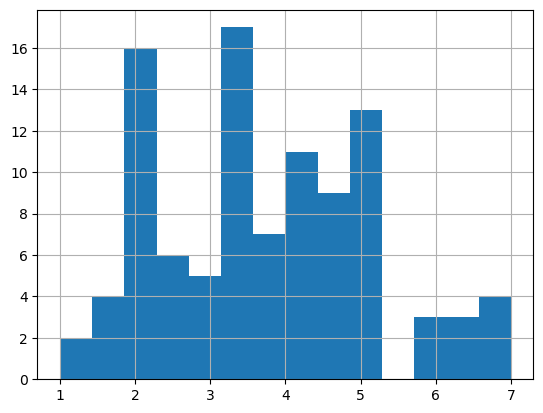

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


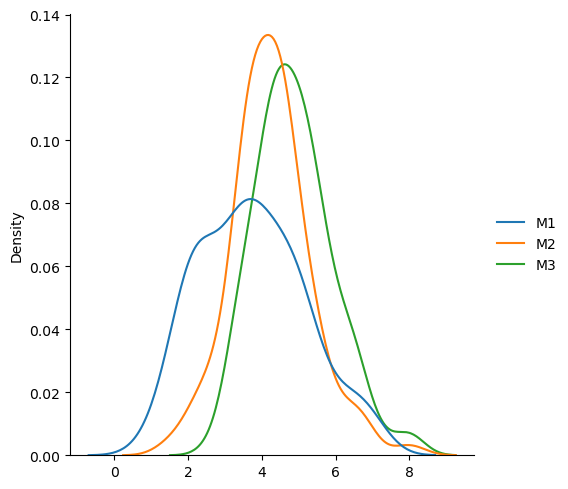

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


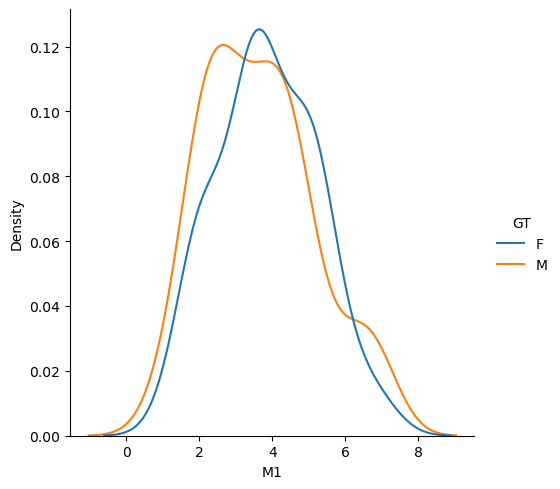

In [30]:


df['M1'].hist(bins=14)
plt.show()



sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()


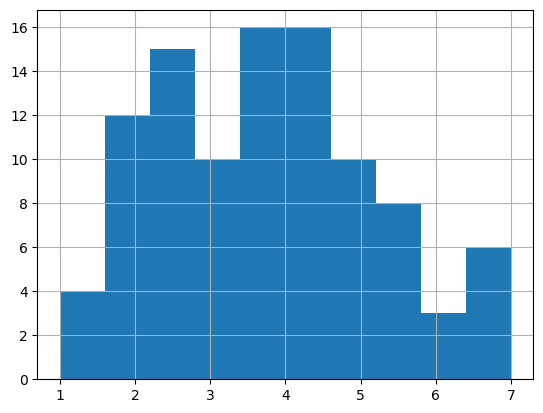

In [31]:
df['M1'].hist()
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


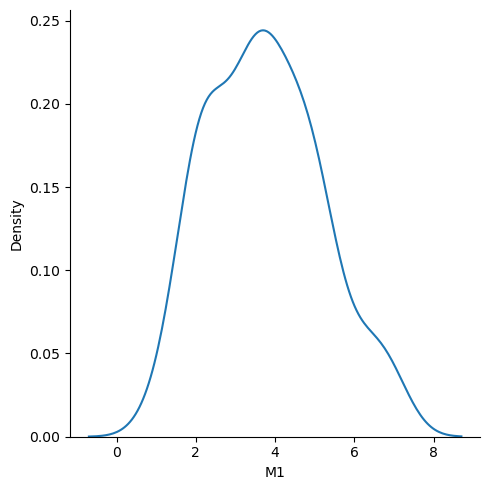

In [32]:
sns.displot(df, x='M1', kind='kde')
plt.show()

# phân phối chuẩn

In [33]:
# Skew
# df['M1'].skew()

df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [34]:
# Kurtosis
# df[['M1']].kurtosis()

df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


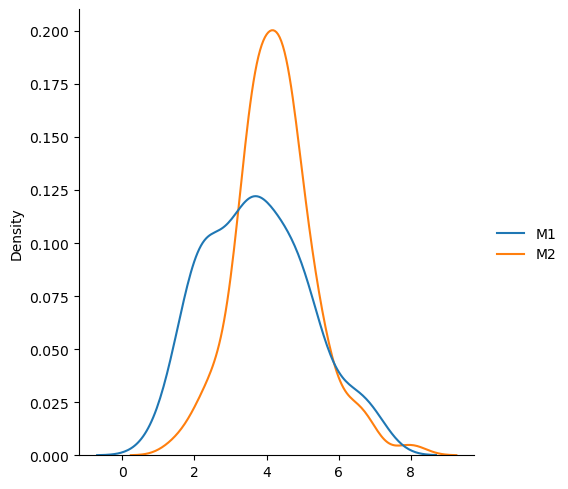

In [35]:
# 
sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()
# Nhìn biểu đồ và phát biển về Kurtosis
# M1 > M2 

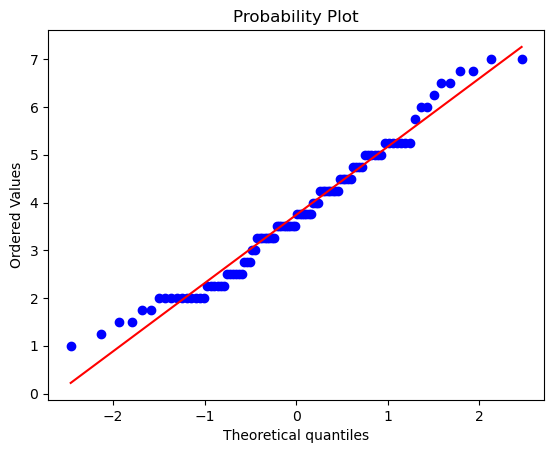

In [36]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

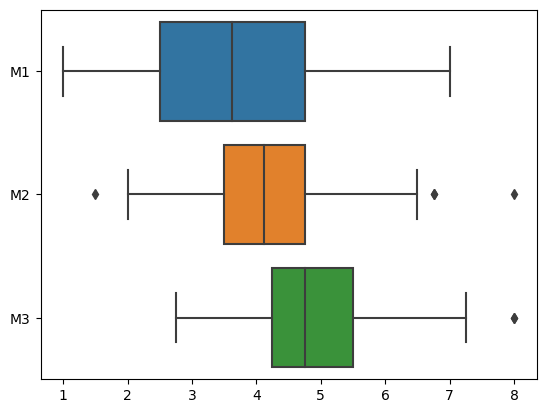

In [37]:
# Box plot
# sns.boxplot(data=df['M1'], orient="h")
# plt.show()

sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

# sns.boxplot(x='M1', y='KT',data=df, orient='h')
# plt.show()

# sns.boxplot(x='M1', y='GT',data=df, orient='h')
# plt.show()



# Dau cham: những giá trị bất thường

In [38]:
# Với điểm M2
# tính khoảng giá trị nghi ngờ bất thường
q1 = df['M2'].quantile(0.25)
q3 = df['M2'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print('Khoảng giá trị nghi ngờ bất thường của M2')
print(f'{lower_bound}\n{upper_bound}')



Khoảng giá trị nghi ngờ bất thường của M2
1.625
6.625


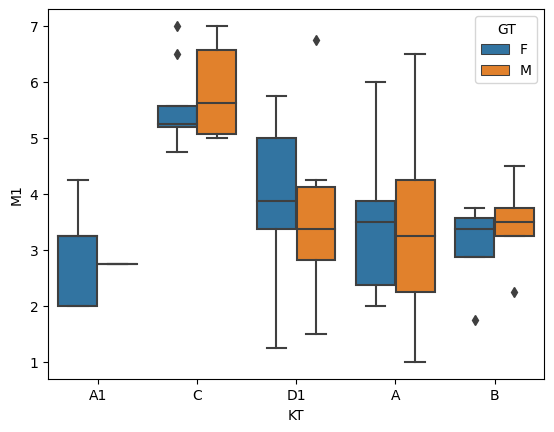

In [39]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

In [40]:
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [41]:
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


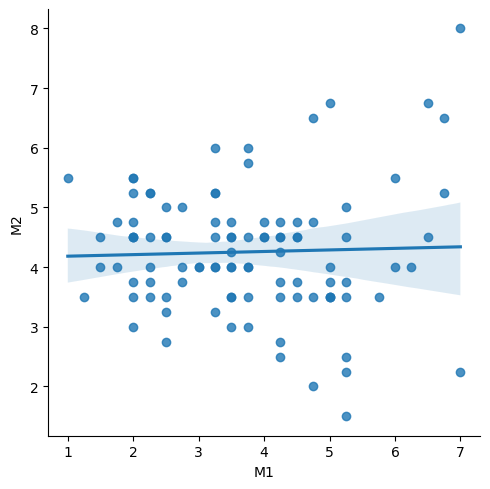

In [42]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


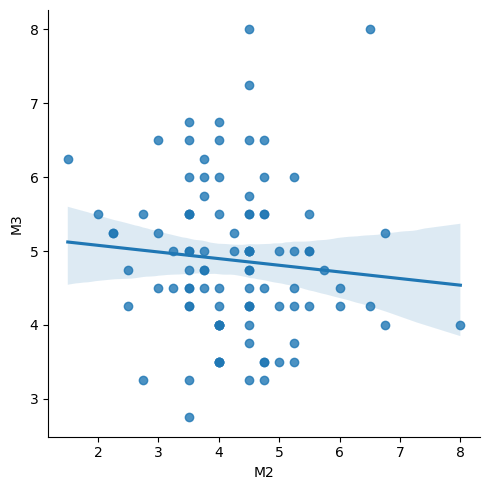

In [43]:
# Vẽ biểu đồ khám phá tương quan tuyến tình giữa M2 và M3
sns.lmplot(data=df, x='M2', y='M3', fit_reg=True)
plt.show()

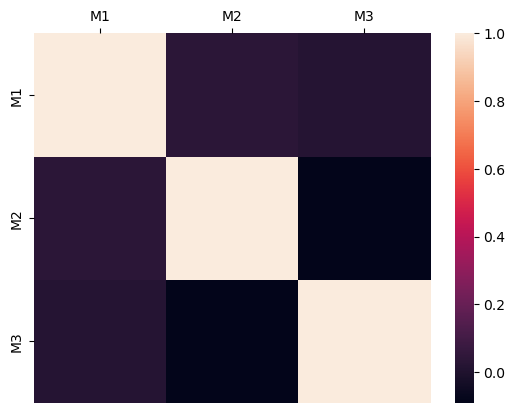

In [44]:

df[['M1','M2','M3']].corr()
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


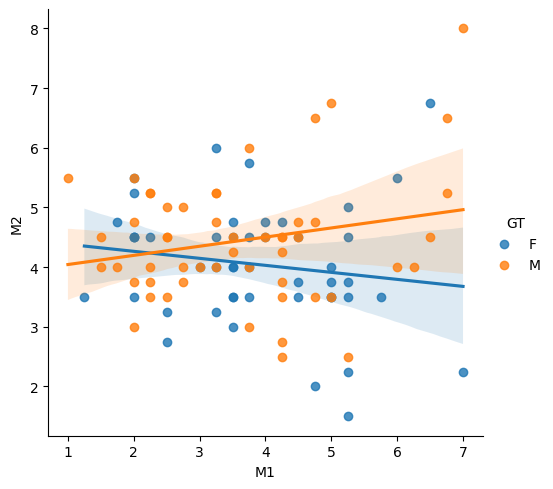

In [45]:
#Nhom Nam co su tương quan cao hon
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


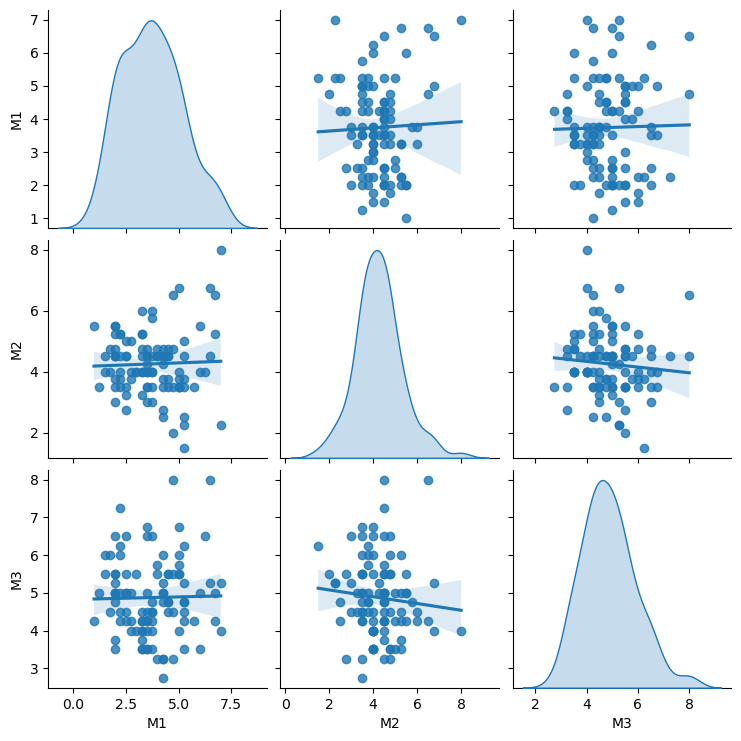

In [46]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()